# Regression Tree 回歸 (計算題)

[Google: sklearn datasets](https://scikit-learn.org/stable/datasets/index.html#toy-datasets)

CRIM：人均犯罪率  
ZN：25,000平方英尺以上民用土地的比例  
INDUS：城镇非零售业商用土地比例  
CHAS：是否邻近查尔斯河，1是邻近，0是不邻近  
NOX：一氧化氮浓度（千万分之一）  
RM：住宅的平均房间数  
AGE：自住且建于1940年前的房屋比例  
DIS：到5个波士顿就业中心的加权距离  
RAD：到高速公路的便捷度指数  
TAX：每万元的房产税率  
PTRATIO：城镇学生教师比例  
B： 1000(Bk − 0.63)2 其中Bk是城镇中黑人比例  
LSTAT：低收入人群比例  
MEDV：自住房中位数价格，单位是千元  

In [1]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
df["target"] = boston["target"]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## STEP
1. **處理資料**：  
   將資料 `train_test_split(特徵, 目標, test_size=0.1)` 切成二份，  
   90% 資料做為訓練模型（train）、10% 資料做為驗證結果（test）； x 表示特徵/題目， y 表示目標/答案 


2. **訓練模型**：  
   決策樹（[`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decisiontreeregressor#sklearn-tree-decisiontreeregressor)）  
   用 90% 題目和 90% 答案 訓練模型 `reg.fit(x_train, y_train)` 


3. **預測結果**：  
   用訓練好的模型 預測結果 `reg.predict(x_test)`


4. **驗證模型**：  
   用 `r2_score(y_test, pre)` 衡量預測正確率  


5. **畫圖**：  
   利用 [graphviz](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html) 畫出決策樹   

   
   
## NOTE  
1. $ gini = \sum p \times(1-p) $，平均猜錯機率，越小越好   
   $ mse= \frac{1}{n} \sum (x-mean)^2 $，集中程度（跟平均的平均距離、誤差範圍），越小越好  
     
   　
2. $ MSE = \frac{1}{n} \sum (predict_i-true_i)^2 $  
   $ RMSE = \sqrt{MSE} $  
   $ MAE = \frac{1}{n} \sum | predict_i-true_i | $   
     
   　
3. RMSE 基數不一樣時，無法對比/比較，故要經過標準化（standardization）  
    $ standardization = \large \frac{\sum (predict_i-true_i)^2}{\sum (mean-true)^2} $
      
    $ standardization = 0 $ ，表示分子=0 　，表示 $ predict = true $ ，表示完美猜準；  
    $ standardization = 1 $ ，表示分子=分母，表示 $ predict = mean $，表示完全瞎猜；
       
    $ r2＿score = 1-standardization $  
    $ r2＿score = 0 $ 　，表示完全瞎猜  
    $ r2＿score = 0.5 $ ，表示預測不錯  
    $ r2＿score = 1 $ 　，表示完美猜準  


4. r2_score 看**預測準不準**，RMSE 看**預測差多少**

In [2]:
from sklearn.model_selection import train_test_split

# train_test_split -> (90%特徵, 10%特徵, 90%目標, 10%目標)
x_train, x_test, y_train, y_test = train_test_split(boston["data"], boston["target"], test_size=0.1)

In [3]:
from sklearn.tree import DecisionTreeRegressor

# 防止過擬合，故做前剪枝：max_depth=5 
reg = DecisionTreeRegressor(max_depth=5)
reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

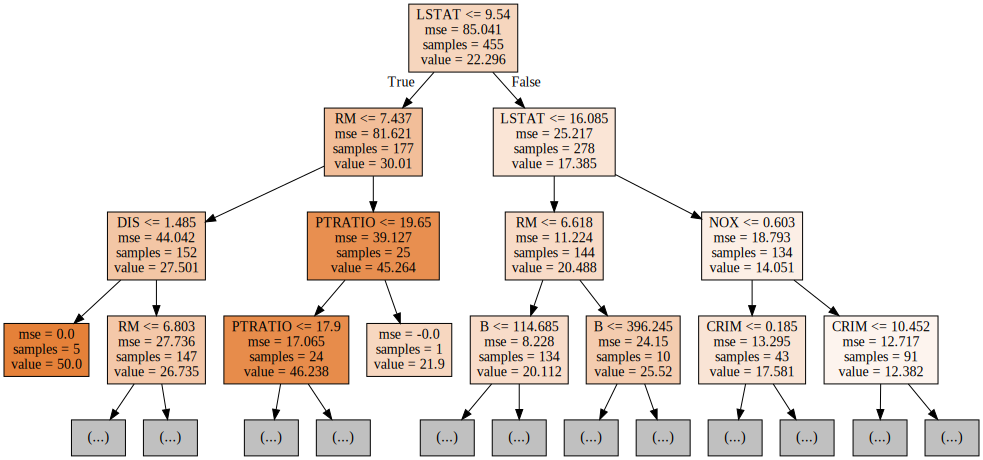

In [4]:
import graphviz
from sklearn.tree import export_graphviz
g = export_graphviz(reg, 
                    feature_names=boston["feature_names"],
                    max_depth=3,
                    filled=True)
graphviz.Source(g)

In [5]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
r2_score(y_test, pre)

0.8000470964015718